In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:

import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
colors = ['royalblue','red','deeppink', 'maroon', 'mediumorchid', 'tan', 'forestgreen', 'olive', 'goldenrod', 'lightcyan', 'navy']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])

In [4]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

In [5]:
lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(X, y).transform(X)

In [6]:
lda.explained_variance_ratio_

array([0.9912126, 0.0087874])

In [7]:
pca = PCA(n_components=4)
X_r = pca.fit(X).transform(X)

Visualizing PCA and LDA

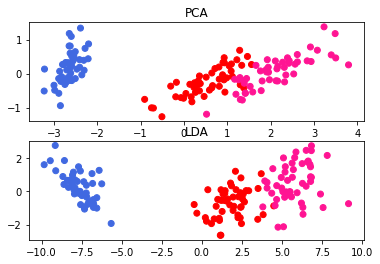

In [8]:
from pylab import *
subplot(2,1,1)
title("PCA")
plt.scatter(X_r[:,0],X_r[:,1],c=vectorizer(y))
subplot(2,1,2)
title("LDA")
plt.scatter(X_r2[:,0],X_r2[:,1],c=vectorizer(y))

In [9]:
import seaborn as sns
df=pd.DataFrame(zip(X_r[:,0],X_r[:,1],X_r2[:,0],X_r2[:,1],y),columns=["pc1","pc2","ld1","ld2","class"])

Comparing across LDs

<AxesSubplot:xlabel='class', ylabel='ld2'>

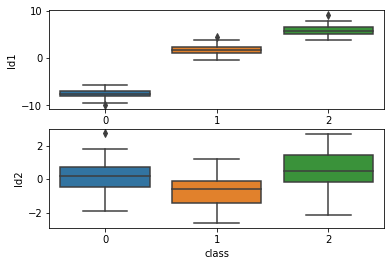

In [10]:
subplot(2,1,1)
sns.boxplot(x='class', y='ld1', data=df)
subplot(2,1,2)
sns.boxplot(x='class', y='ld2', data=df)

Comparing across main LD and PC

<AxesSubplot:xlabel='class', ylabel='pc1'>

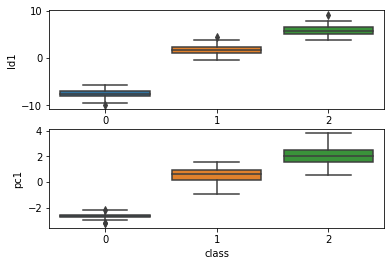

In [11]:
subplot(2,1,1)
sns.boxplot(x='class', y='ld1', data=df)
subplot(2,1,2)
sns.boxplot(x='class', y='pc1', data=df)

In [19]:
pc.columns

NameError: name 'pc' is not defined

Transforming LDA

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(X_train, y_train)
#x_test_r2=lda.transform(X_test)

LinearDiscriminantAnalysis(n_components=2)

Accuracy Score

In [14]:
from sklearn.metrics import accuracy_score
y_pred = lda.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9210526315789473
